# Loading Libraries and excel data onto Notebook

In [1]:
''' ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip '''

' ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip '

# Datasets

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Visualize report from pandas profiling

In [4]:
''' profile = ProfileReport(data, title='creditcard', explorative=True)
profile.to_notebook_iframe() '''

" profile = ProfileReport(data, title='creditcard', explorative=True)\nprofile.to_notebook_iframe() "

In [5]:
''' !pip install flask-ngrok
!pip install flask-bootstrap

from flask import Flask, render_template
from flask_bootstrap import Bootstrap
from flask_ngrok import run_with_ngrok '''

' !pip install flask-ngrok\n!pip install flask-bootstrap\n\nfrom flask import Flask, render_template\nfrom flask_bootstrap import Bootstrap\nfrom flask_ngrok import run_with_ngrok '

In [6]:
''' profile.to_file(output_file="Credit_report.html") '''

' profile.to_file(output_file="Credit_report.html") '

In [7]:
''' app = Flask(__name__)
app._static_folder = '/content/'
bootstrap = Bootstrap(app)
run_with_ngrok(app)

@app.route("/")
def home():
  return render_template('Credit_report.html')
app.run() '''

' app = Flask(__name__)\napp._static_folder = \'/content/\'\nbootstrap = Bootstrap(app)\nrun_with_ngrok(app)\n\n@app.route("/")\ndef home():\n  return render_template(\'Credit_report.html\')\napp.run() '

# Understanding the dataset

count how many transactions are true = 0, and how many are false = 1

Text(0, 0.5, 'Non Fraudulent')

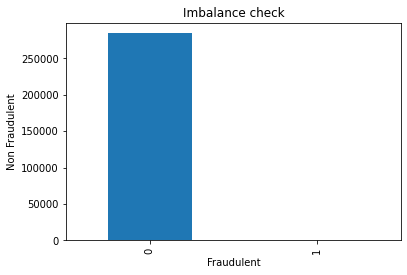

In [8]:

count_class= pd.value_counts(data['Class'], sort = True)
count_class.plot(kind='bar')

plt.title ("Imbalance check")
plt.xlabel ("Fraudulent")
plt.ylabel ("Non Fraudulent")

<AxesSubplot:ylabel='Frequency'>

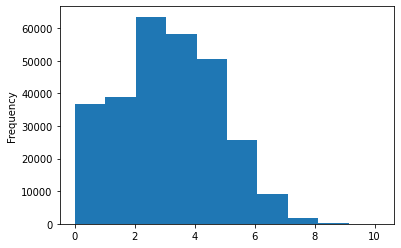

In [9]:
#Normalize the amount column and storing in a new column

data['logAmount'] = np.log(data['Amount']+1)

data['logAmount'].sort_values().plot.hist()

In [10]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape (-1,1))
data = data.drop (['Time', 'Amount','logAmount'], axis = 1)

# Separate the data into two, one containing the X values and the other with the y values

In [11]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']
len(y[y.Class ==1])

492

# Resampling --> for dealing with imblanced datasets

# Undersampling --> Remove the majority class
# Oversampling --> Synthetically replicate minority classes
# - SMOTE --> A combination of the previous two


In [12]:
#Fraudulent cases
number_records_fraud = len(data[data.Class==1])
#extract fraud and non-fraud
fraud_indices = np.array (data[data.Class==1].index)
normal_indices = np.array (data[data.Class==0].index)

#randomly obtain a number of non-fraud indices, equal to the fraud cases

random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )

#Combine the fraud cases with the random ones

under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

#Choose values of indices

under_sample_data = data.iloc[under_sample_indices,:]

#Separate X and Y 
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class']

y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class']


In [13]:
#Split training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)



# Model Building and training

Multi layer perceptron model

In [14]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [15]:
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
MLPC.fit(X_train_under, y_train_under)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)

In [16]:
y_pred = MLPC.predict(X_test)
recall_acc = recall_score (y_test,y_pred)
recall_acc

0.9591836734693877

In [17]:
ReportMLPC = classification_report(y_test,y_pred)

print(ReportMLPC)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85296
           1       0.04      0.96      0.08       147

    accuracy                           0.96     85443
   macro avg       0.52      0.96      0.53     85443
weighted avg       1.00      0.96      0.98     85443



Text(33.0, 0.5, 'True class')

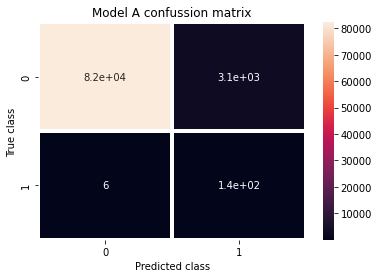

In [18]:
import seaborn as sns 

matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix, annot=True, linewidths=3)
plt.title('Model A confussion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')

# Model 2: SVM  

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score

clf_svm = SVC(kernel='rbf', gamma = 0.0001, C=1e1)

clf_svm.fit(X_train_under, y_train_under)

y_SVMpred = clf_svm.predict(X_test)

print('Accuracy of SVM is:', accuracy_score(y_test, y_SVMpred))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVM is: 0.9976241470922135


In [20]:
ReportSVM = classification_report(y_test,y_SVMpred)

print(ReportSVM)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.41      0.85      0.55       147

    accuracy                           1.00     85443
   macro avg       0.70      0.92      0.78     85443
weighted avg       1.00      1.00      1.00     85443



Text(33.0, 0.5, 'True class')

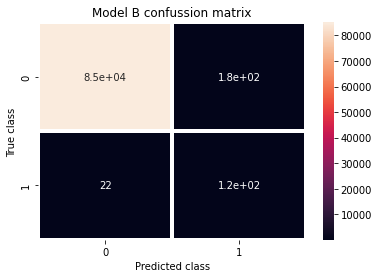

In [21]:
import seaborn as sns 

matrixA = confusion_matrix(y_test,y_SVMpred)
sns.heatmap(matrixA, annot=True, linewidths=3)
plt.title('Model B confussion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')

# Model 3: Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_under, y_train_under)

y_RFpred = clf.predict(X_test)
print('Accuracy of RandomForest is:', accuracy_score(y_test, y_RFpred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy of RandomForest is: 0.9726601359970974


In [23]:
ReportRF = classification_report(y_test,y_RFpred)

print(ReportRF)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.06      0.95      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.96      0.55     85443
weighted avg       1.00      0.97      0.98     85443



Text(33.0, 0.5, 'True class')

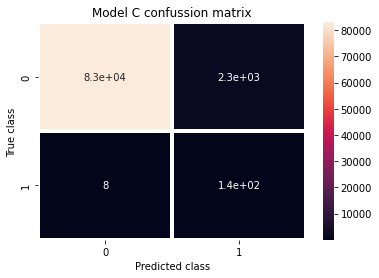

In [24]:
matrixB = confusion_matrix(y_test,y_RFpred)
sns.heatmap(matrixB, annot=True, linewidths=3)
plt.title('Model C confussion matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')

# Synthetic data with GANs

To start the process of generating synthetic data, the labels of the credit card transactions are separated based on whether they are fraudulant or not. 

*   A GAN is trained to generate synthetic data for fraudulant transactions: class == 1


In [25]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   V1          284807 non-null  float64
 1   V2          284807 non-null  float64
 2   V3          284807 non-null  float64
 3   V4          284807 non-null  float64
 4   V5          284807 non-null  float64
 5   V6          284807 non-null  float64
 6   V7          284807 non-null  float64
 7   V8          284807 non-null  float64
 8   V9          284807 non-null  float64
 9   V10         284807 non-null  float64
 10  V11         284807 non-null  float64
 11  V12         284807 non-null  float64
 12  V13         284807 non-null  float64
 13  V14         284807 non-null  float64
 14  V15         284807 non-null  float64
 15  V16         284807 non-null  float64
 16  V17         284807 non-null  float64
 17  V18         284807 non-null  float64
 18  V19         284807 non-null  float64
 19  V2

In [27]:
#needed Library for synthetic data
!pip install ydata-synthetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
#Specify numerical and categorical data 

num_cols = ['Class']
cat_cols = list(data.drop(num_cols, axis=1).columns)

#Selecting the rows of minority class from the data

training_data = data.loc[data['Class']==1].copy()

In [29]:
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.synthesizers.regular import WGAN_GP

In [30]:
#select the GAN model
modelGAN = WGAN_GP

#Setting the parameters of the GAN model
noise_dim = 30
dim = 30
batch_size = 984

log_step = 100
epochs = 5
learning_rate = 5e-4
beta_1 = 0.5
beta_2 = 0.9
models_dir = './cache'

#Setting WGAN parameters

gan_args = ModelParameters(batch_size=batch_size, lr=learning_rate, betas=(beta_1, beta_2), noise_dim=noise_dim, layers_dim=dim)

train_args = TrainParameters(epochs=epochs, sample_interval=log_step)

#Initializing the GAN model
synthesizer = modelGAN(gan_args, n_critic = 10)


In [31]:
#Training GAN model
synthesizer.train(data = training_data, train_arguments = train_args, num_cols = num_cols, cat_cols = cat_cols)

 20%|██        | 1/5 [01:06<04:24, 66.08s/it]

Epoch: 0 | disc_loss: 3337.64599609375 | gen_loss: 0.025265686213970184


 40%|████      | 2/5 [01:23<01:51, 37.24s/it]

Epoch: 1 | disc_loss: 1476.4820556640625 | gen_loss: 0.020276160910725594


 60%|██████    | 3/5 [01:34<00:50, 25.45s/it]

Epoch: 2 | disc_loss: 558.5543212890625 | gen_loss: 0.009084993973374367


 80%|████████  | 4/5 [01:45<00:19, 19.92s/it]

Epoch: 3 | disc_loss: 233.55801391601562 | gen_loss: 0.005022378638386726


100%|██████████| 5/5 [01:57<00:00, 23.48s/it]

Epoch: 4 | disc_loss: 73.99163055419922 | gen_loss: 0.002361914375796914


In [32]:
#Generating synthetic data of 290 examples of Fraudulent cases
minority_synth_data = synthesizer.sample(290)

Synthetic data generation: 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]


In [ ]:
#generate data for the majority class - same steps as above but Epoch will be 

#Selecting the rows of majority class from the data
train_data = data.loc[ data['Class']==0 ].copy()

#WGAN with Gradient Penalty is chosen as the GAN architecture
model = WGAN_GP

#Setting the parameters of the GAN model
noise_dim = 30
dim = 30
batch_size = 984

log_step = 100
epochs = 5
learning_rate = 5e-4
beta_1 = 0.5
beta_2 = 0.9
models_dir = './cache'

#Setting the model parameters and the training step parameters of the GAN model
gan_args = ModelParameters(batch_size=batch_size, lr=learning_rate, betas=(beta_1, beta_2), noise_dim=noise_dim,layers_dim=dim)

train_args = TrainParameters(epochs=epochs, sample_interval=log_step)

#Initializing the GAN model
synthesizer2 = model(gan_args, n_critic = 10)

#Training the GAN model
synthesizer2.train(data = train_data, train_arguments = train_args, num_cols = num_cols, cat_cols = cat_cols)

#Generating synthetic data of 290 examples of non-fraudulent cases
majority_synth_data = synthesizer2.sample(290)


In [ ]:
#merging the 2 datasets to create the final synthetic dataframe
synth_df = pd.concat([majority_synth_data, minority_synth_data], ignore_index=True)

synth_df.head()